In [1]:
import pandas as pd
%matplotlib inline

In [60]:
pass_data = pd.read_csv('train.csv',  sep=',')
pass_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Kоличество мужчин и женщин, которые ехали на корабле

In [3]:
print(pass_data.groupby(['Sex'])['PassengerId'].count())

Sex
female    314
male      577
Name: PassengerId, dtype: int64


### Определите какой части пассажиров удалось выжить. Посчитайте долю выживших пассажиров


In [4]:
survived=pass_data.groupby(['Survived'])['PassengerId'].count()
print(survived)

Survived
0    549
1    342
Name: PassengerId, dtype: int64


In [5]:
survived_live=pass_data[pass_data['Survived']==1]['PassengerId'].count()
survived_live

342

In [6]:
survived_live_percentage=100.0 * survived_live/survived.sum()
survived_live_percentage

38.38383838383838

### Какую долю пассажиры первого класса составляли среди всех пассажиров

In [7]:
passengers_1=pass_data[pass_data['Pclass']==1]['PassengerId'].count()
passengers_1

216

In [8]:
passengers_1_percentage=100.0 * passengers_1/survived.sum()
passengers_1_percentage

24.242424242424242

### Какого возраста были пассажиры? Посчитайте среднее и медиану возраста пассажиров. 


In [9]:
pass_data['Age'].dropna() # с удалением пропущенных значений

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 714, dtype: float64

In [10]:
pass_data['Age'].mean()

29.69911764705882

In [11]:
pass_data['Age'].median()

28.0

### Коррелируют ли число братьев/сестер с числом родителей/детей? Посчитайте корреляцию Пирсона между признаками SibSp и Parch. Оцените значение p-value. Постройте плотность распределения признаков SibSp и Parch.

In [12]:
correlation = pass_data['SibSp'].corr(pass_data['Parch'])
correlation # средняя умеренная, положительная корреляция

0.41483769862015696

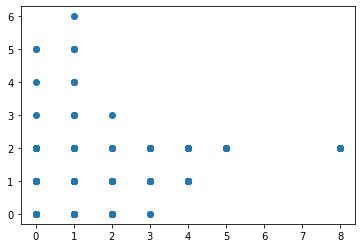

In [43]:
import matplotlib.pyplot as plt
plt.scatter(pass_data['SibSp'],pass_data['Parch'])
plt.show()

### Какое самое популярное женское имя на корабле? Извлеките из полного имени пассажира (колонка Name) его личное имя (First Name). Попробуйте вручную разобрать несколько значений столбца Name и выработать правило для извлечения имен, а также разделения их на женские и мужские.

In [204]:
import re
def name(name):
    # Первое слово перед запятой - фамилия
    s = re.search('^[^,]+, (.*)', name)
    if s:
        name = s.group(1)

    # получаем имя из фигурных скобок (если в фигурных скобках)
    s = re.search('\(([^)]+)\)', name)
    if s:
        name = s.group(1)

    # Удаление
    name = re.sub('(Miss\. |Mrs\. |Ms\. |Mr\. |Master\. |Rev\. |Dr\. |Mr)', '', name)

    # Получаем первое левое слово и удаляем кавычки
    name = name.split(' ')[0].replace('"', '')

    return name


name_female = pass_data[pass_data['Sex'] == 'female']['Name'].map(name)
names_female = name_female.value_counts()
names_female.head()


Mary         15
Anna         15
Elizabeth    11
Margaret     10
Alice         6
Name: Name, dtype: int64

In [36]:
name_male = pass_data[pass_data['Sex'] == 'male']['Name'].map(name)
names_male = name_male.value_counts()
names_male.head()

William    36
John       21
George     14
Thomas     13
Henry      12
Name: Name, dtype: int64

In [207]:
print(names_female.head(1).index.values[0])

Mary


### Коррелирует ли класс, которым ехал пассажир, с выживаемостью?

In [40]:
correlation = pass_data['Pclass'].corr(pass_data['Survived'])
correlation # средняя умеренная, отрицательная корреляция

-0.3384810359610149

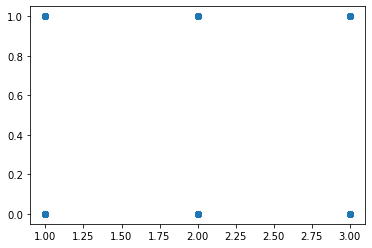

In [41]:
plt.scatter(pass_data['Pclass'],pass_data['Survived'])
plt.show() # не коррелирует 

### Визуализируйте гистограммы возраста для выживших и не выживших пассажиров. Сделайте выводы. Отобразите данные на одном и нескольких графиках

Text(0, 0.5, 'Age')

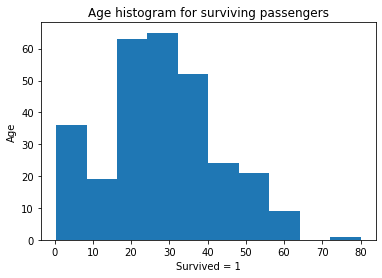

In [85]:
import matplotlib.pyplot as plt
ax=pass_data[pass_data['Survived'] == 1]['Age'].plot(kind='hist', title='Age histogram for surviving passengers')
ax.set_xlabel("Survived = 1")
ax.set_ylabel("Age")
# в основном выжили молодые люди и люди средних лет

Text(0, 0.5, 'Age')

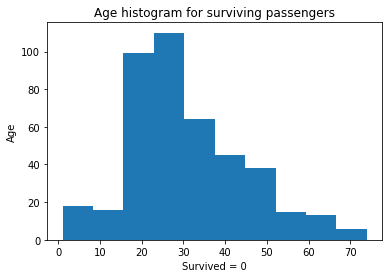

In [86]:
ax=pass_data[pass_data['Survived'] == 0]['Age'].plot(kind='hist', title='Age histogram for surviving passengers')
ax.set_xlabel("Survived = 0")
ax.set_ylabel("Age")
# погибли люди старшего поколения

<AxesSubplot:>

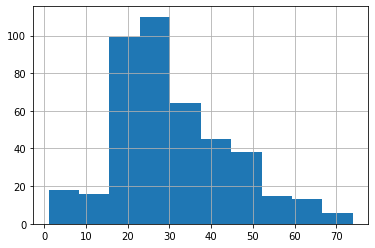

In [95]:
pass_data[pass_data['Survived'] == 0]['Age'].hist(bins = 10)

### Визуализируйте гистограммы возраста для выживших и не выживших пассажиров по классам. Сделайте выводы. 

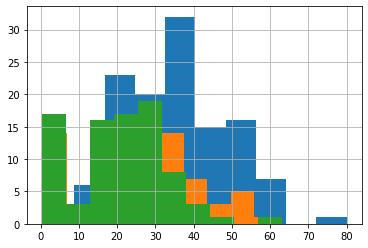

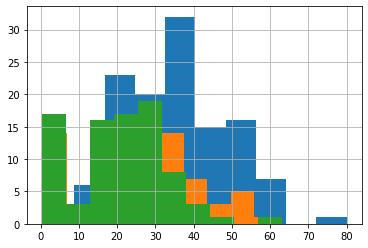

In [202]:
pass_data[(pass_data.Survived == 1)&(pass_data.Pclass == 1)].Age.hist().get_figure()
pass_data[(pass_data.Survived == 1)&(pass_data.Pclass == 2)].Age.hist().get_figure()
pass_data[(pass_data.Survived == 1)&(pass_data.Pclass == 3)].Age.hist().get_figure()
# больше выжило человек из 1 класса

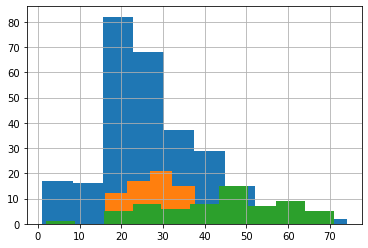

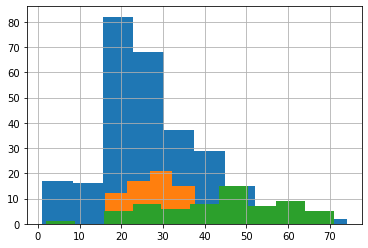

In [201]:
pass_data[(pass_data.Survived == 0)&(pass_data.Pclass == 3)].Age.hist().get_figure()
pass_data[(pass_data.Survived == 0)&(pass_data.Pclass == 2)].Age.hist().get_figure()
pass_data[(pass_data.Survived == 0)&(pass_data.Pclass == 1)].Age.hist().get_figure()
# погибло больше человек 3 класса

### Постройте столбчатую диаграмму количества людей: мужчины, женщины, дети

<AxesSubplot:>

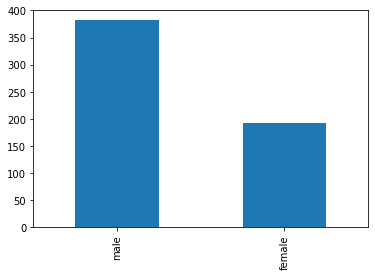

In [179]:
pass_data[(pass_data.Age>18)].Sex.value_counts().plot.bar()

<AxesSubplot:>

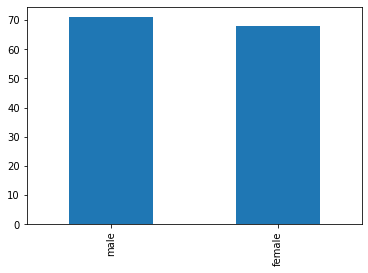

In [171]:
pass_data[(pass_data.Age<=18)].Sex.value_counts().plot.bar()